# Linear Regression Models With Logarithmic Transformations

In this notebook I provide an overview of how to implement the four types of the linear regression model using scikit-learn: <sup>1</sup>

![linear_models](./input/linear_models.png)

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

In [174]:
def plot_regression_line(model, x, y, plot_title):
    """ Plots regression line based on a fitted model """

    preds_x = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
    preds_y = model.predict(preds_x)

    plt.title(plot_title)
    plt.scatter(x, y)
    plt.plot(preds_x, preds_y, '--r')
    plt.show()

## Level-Level Regression

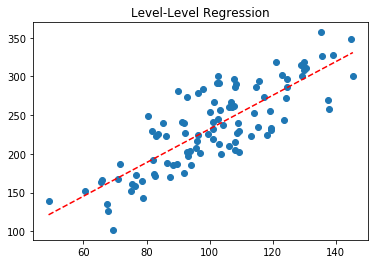

In [183]:
# Create exemplary dataset
np.random.seed(0)
x = 100 + 20 * np.random.randn(100).reshape(-1, 1)
y = 30 + 2 * x + 30 * np.random.randn(100).reshape(-1, 1)

# Fit model
level_level = LinearRegression()
level_level.fit(x, y)

# Plot regression line
plot_regression_line(level_level, x, y, 'Level-Level Regression')

## Log-Linear Regression

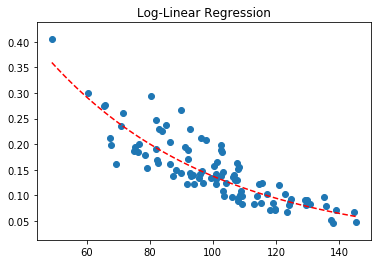

In [185]:
# Create exemplary dataset
np.random.seed(0)
x = 100 + 20 * np.random.randn(100).reshape(-1, 1)
y = np.exp(-0.02 * x + 0.2 * np.random.randn(100).reshape(-1, 1))

# Fit model
log_linear = make_pipeline(
    TransformedTargetRegressor(
        regressor=LinearRegression(),
        func=np.log,
        inverse_func=np.exp
    )
)
log_linear.fit(x, y)

# Plot regression line
plot_regression_line(log_linear, x, y, 'Log-Linear Regression')

## Linear-Log Regression

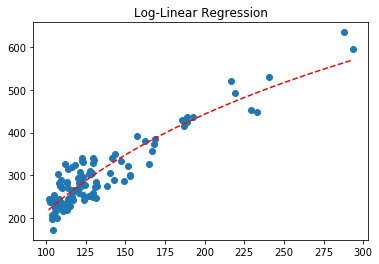

In [189]:
# Create exemplary dataset
np.random.seed(0)
x = 100 + 20 * np.random.lognormal(size=100).reshape(-1, 1)
y = 30 + 2 * x + 30 * np.random.randn(100).reshape(-1, 1)

# Fit model
linear_log = make_pipeline(
    FunctionTransformer(np.log), LinearRegression()
)
linear_log.fit(x, y)

# Plot regression line
plot_regression_line(linear_log, x, y, 'Log-Linear Regression')

## Log-Log Regression

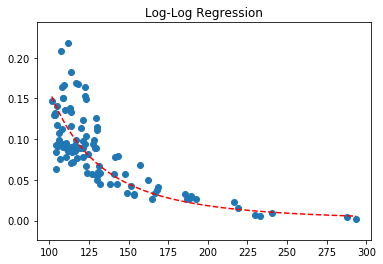

In [193]:
# Create exemplary dataset
np.random.seed(0)
x = 100 + 20 * np.random.lognormal(size=100).reshape(-1, 1)
y = np.exp(-0.02 * x + 0.3 * np.random.randn(100).reshape(-1, 1))

# Fit model
log_log = make_pipeline(
    FunctionTransformer(np.log),
    TransformedTargetRegressor(
        regressor=LinearRegression(),
        func=np.log,
        inverse_func=np.exp
    )
)
log_log.fit(x, y)

# Plot regression line
plot_regression_line(log_log, x, y, 'Log-Log Regression')

<sup>1</sup> Image source: (https://www.kdnuggets.com/2017/10/learn-generalized-linear-models-glm-r.html/2)[https://www.kdnuggets.com/2017/10/learn-generalized-linear-models-glm-r.html/2]